In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Data preparation

In [23]:
from get_dataset import fetch_dataset
data, attrs = fetch_dataset()

images not found, donwloading...
extracting...
done
attributes not found, downloading...
done


In [24]:
tr_size = 10000
val_size = len(data) - tr_size

In [25]:
X_train = data[:tr_size]
X_val = data[tr_size:val_size+tr_size]

In [26]:
x_train = []
x_val = []

for i in range(tr_size):
  x_train.append(transforms.ToTensor()(X_train[i]).float())

for i in range(val_size):
  x_val.append(transforms.ToTensor()(X_val[i]).float())

In [27]:
from torch.utils.data import DataLoader
batch_size = 10
data_tr = DataLoader(x_train, batch_size=batch_size, shuffle=True)
data_val = DataLoader(x_val, batch_size=batch_size, shuffle=True)

In [28]:
IMAGE_H = data.shape[1]
IMAGE_W = data.shape[2]

In [29]:
def plot_gallery(images, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        try:
            plt.imshow(images[i].reshape((h, w, 3)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
            plt.xticks(())
            plt.yticks(())
        except:
            pass

# Vanilla autoencoder

In [32]:
from copy import deepcopy

class Autoencoder(nn.Module):
    def __init__(self, image_size, h_dim=512, z_dim=20):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(image_size,512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, z_dim)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Sigmoid()
        )
      
        
    def forward(self, x):
        latent_code = self.encoder(x)
        reconstruction = self.decoder(latent_code)
        
        
        return latent_code, reconstruction

In [33]:
from copy import deepcopy
class OneAutoencoder(nn.Module):
    def __init__(self):
      super().__init__()
      self.enc_cnn_1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=1)
      self.enc_cnn_2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
      self.enc_linear_1 = nn.Linear(11 * 11 * 20, 200)
      self.enc_linear_2 = nn.Linear(200, dim_code)
      


      self.dec_linear_1 = nn.Linear(dim_code, 11 * 11 * 20)
      self.dec_linear_2 = nn.Linear(11 * 11 * 20, 45 * 45 * 3)
      
        
    def forward(self, x):
      latent_code = self.encode(x)
      reconstruction = self.decode(latent_code)

      return reconstruction, latent_code
    
    def encode(self, images):
      code = self.enc_cnn_1(images) 
      code = F.relu(F.max_pool2d(code, 2)) 
      code = self.enc_cnn_2(code)  
      code = F.relu(F.max_pool2d(code, 2)) 

      code = code.view([-1, 11 * 11 * 20])
      code = F.relu(self.enc_linear_1(code))
      code = F.sigmoid(self.enc_linear_2(code))
      return code

    def decode(self, code):
      out = F.relu(self.dec_linear_1(code))
      out = F.sigmoid(self.dec_linear_2(out))
      out = out.view([-1, 3, 45, 45])
      return out

In [34]:
dim_code = 50

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 	Training Loss: 0.626232,	Val Loss: 0.606325 
Epoch: 1 	Training Loss: 0.615300,	Val Loss: 0.600423 
Epoch: 2 	Training Loss: 0.612402,	Val Loss: 0.619783 
Epoch: 3 	Training Loss: 0.610944,	Val Loss: 0.600766 
Epoch: 4 	Training Loss: 0.609823,	Val Loss: 0.583076 
Epoch: 5 	Training Loss: 0.608998,	Val Loss: 0.603021 
Epoch: 6 	Training Loss: 0.608219,	Val Loss: 0.622555 
Epoch: 7 	Training Loss: 0.607632,	Val Loss: 0.637040 
Epoch: 8 	Training Loss: 0.607136,	Val Loss: 0.610141 
Epoch: 9 	Training Loss: 0.606777,	Val Loss: 0.609442 
Epoch: 10 	Training Loss: 0.606436,	Val Loss: 0.611334 
Epoch: 11 	Training Loss: 0.606122,	Val Loss: 0.605189 
Epoch: 12 	Training Loss: 0.605782,	Val Loss: 0.614095 
Epoch: 13 	Training Loss: 0.605535,	Val Loss: 0.612863 
Epoch: 14 	Training Loss: 0.605260,	Val Loss: 0.609517 
Epoch: 15 	Training Loss: 0.605044,	Val Loss: 0.609894 
Epoch: 16 	Training Loss: 0.604863,	Val Loss: 0.602754 
Epoch: 17 	Training Loss: 0.604686,	Val Loss: 0.609505 
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch: 20 	Training Loss: 0.604188,	Val Loss: 0.613429 
Epoch: 21 	Training Loss: 0.604049,	Val Loss: 0.606524 
Epoch: 22 	Training Loss: 0.603913,	Val Loss: 0.614042 
Epoch: 23 	Training Loss: 0.603807,	Val Loss: 0.607636 
Epoch: 24 	Training Loss: 0.603697,	Val Loss: 0.625953 
Epoch: 25 	Training Loss: 0.603583,	Val Loss: 0.604638 
Epoch: 26 	Training Loss: 0.603487,	Val Loss: 0.605385 
Epoch: 27 	Training Loss: 0.603399,	Val Loss: 0.611024 
Epoch: 28 	Training Loss: 0.603306,	Val Loss: 0.600871 
Epoch: 29 	Training Loss: 0.603229,	Val Loss: 0.604111 
Epoch: 30 	Training Loss: 0.603131,	Val Loss: 0.621727 
Epoch: 31 	Training Loss: 0.603068,	Val Loss: 0.587124 
Epoch: 32 	Training Loss: 0.602975,	Val Loss: 0.620353 
Epoch: 33 	Training Loss: 0.602921,	Val Loss: 0.632407 
Epoch: 34 	Training Loss: 0.602864,	Val Loss: 0.603992 
Epoch: 35 	Training Loss: 0.602799,	Val Loss: 0.591660 
Epoch: 36 	Training Loss: 0.602764,	Val Loss: 0.608645 
Epoch: 37 	Training Loss: 0.602677,	Val Loss: 0.

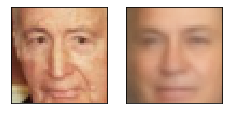

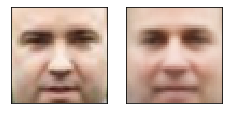

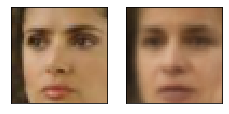

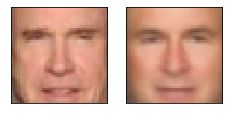

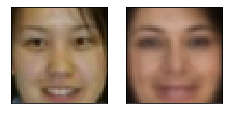

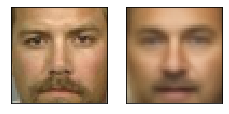

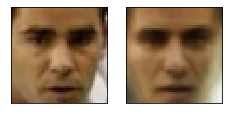

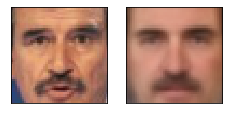

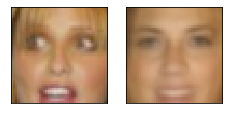

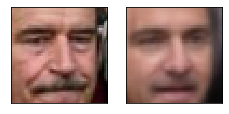

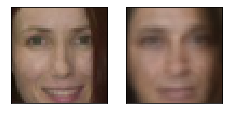

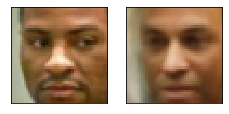

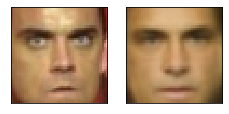

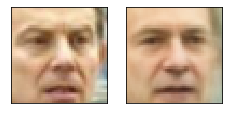

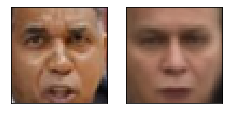

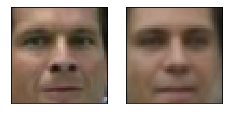

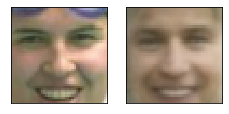

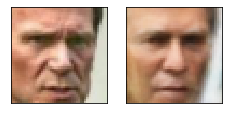

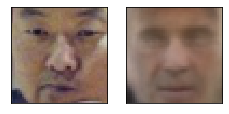

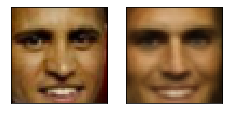

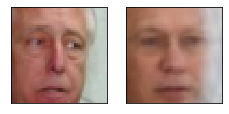

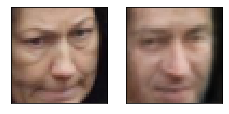

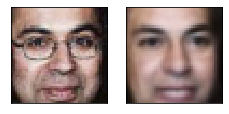

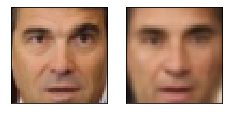

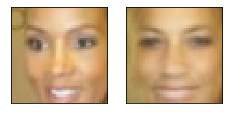

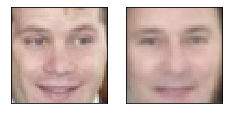

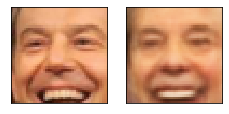

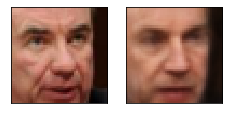

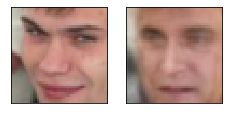

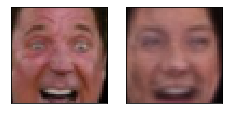

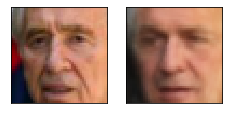

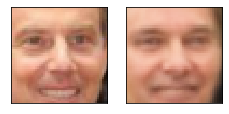

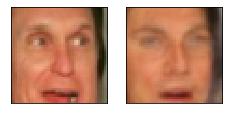

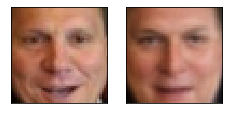

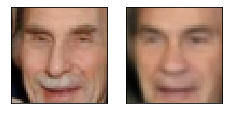

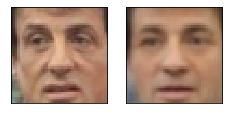

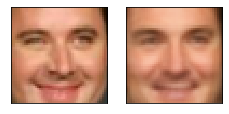

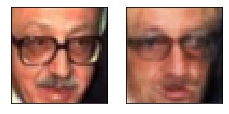

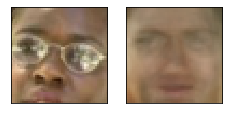

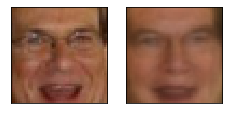

In [35]:
model = OneAutoencoder().to(device)
optim=torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn=nn.BCELoss()
history_train = []
history_val = []
train_loss = 0.0
val_loss = 0.0
epochs = 40

for i in range(epochs):
  for batch in data_tr:
      batch = batch.to(device)
      optim.zero_grad()
      loss = loss_fn(model(batch)[0], batch)
      loss.backward()
      optim.step()
      train_loss += loss.cpu().detach().numpy()

  train_loss = train_loss/len(data_tr)
  history_train.append(train_loss)
      
  
  for batch in data_val:
      batch = batch.to(device)            
      output = model(batch)[0]            
      valloss = loss_fn(output, batch)            
      val_loss += loss.cpu().detach().numpy()

  val_loss = val_loss/len(data_val)
  history_val.append(val_loss)

  plot_gallery([batch[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0), output[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0) ], IMAGE_H, IMAGE_W, n_row=1, n_col=2)
  print('Epoch: {} \tTraining Loss: {:.6f},\tVal Loss: {:.6f} '.format(
        i, 
        train_loss,
        val_loss
        ))


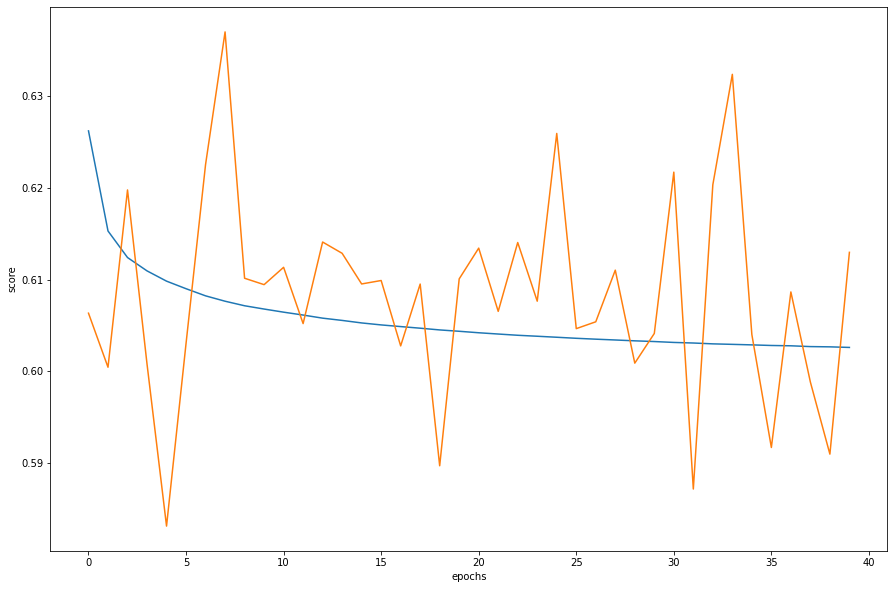

In [36]:
plt.figure(figsize=(15,10))
plt.plot(history_train, label='Train')
plt.plot(history_val, label='Val')
plt.xlabel("epochs")
plt.ylabel("score")
plt.show()

In [37]:
for batch in data_val:
        batch = batch.to(device)
        output = model(batch)[0]
        break;

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [38]:
a = batch.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
b = output.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)

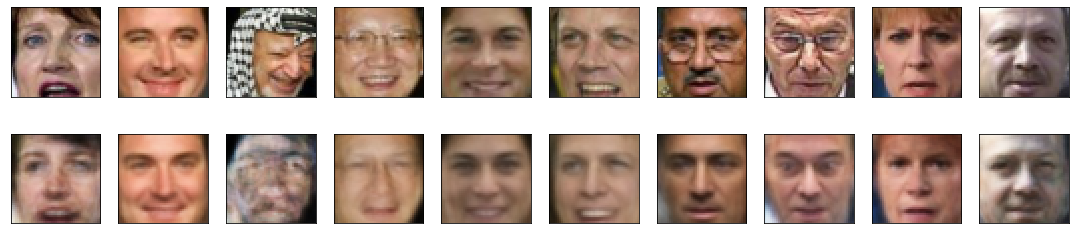

In [39]:
plot_gallery(np.concatenate((a,b), axis=0),IMAGE_H,IMAGE_W, n_row=2, n_col=10)

Пихнем рандомный вектор декодеру 


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


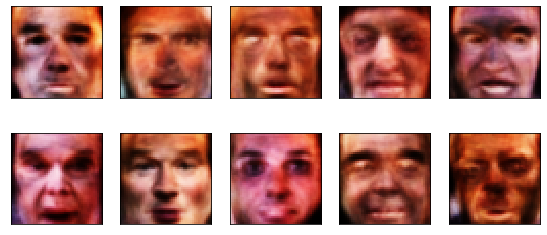

In [40]:
r = torch.rand(25,50).to(device)
output = model.decode(r)
plot_gallery(output.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1), IMAGE_H, IMAGE_W, n_row=2, n_col=5)

# Smiling

In [41]:
import pandas as pd

Отсортим по "Smiling" и получим улыбающиеся лица, далее аналогично с грустными

In [42]:
df = attrs
df = df.sort_values(by="Smiling", ascending=False)
df.head(40)

Male     Asian  ... Wearing Necktie Wearing Necklace
8643    -2.51113  -1.76019  ...        -0.59929          1.11155
1816   -0.626934 -0.472967  ...       -0.335121          0.72465
13034   -1.52268 -0.454004  ...        -1.13999          1.54333
5624    -2.65704  -2.05056  ...       -0.975989         0.637409
1045    -1.94055 -0.583674  ...        -1.58417         0.964526
4681    -0.79572 -0.244533  ...         -1.8058         0.308181
6139    -1.44733  -1.05412  ...        -1.64282         0.478305
11797   -2.15586 -0.691745  ...        -1.41306         0.716994
1359    0.486669   -1.8897  ...       -0.311059         0.486818
2031    -3.26303 -0.879805  ...        -1.27465          2.10605
1955   -0.595375  -1.02126  ...        0.581588         0.858348
9004  -0.0840932 -0.806071  ...        -0.69361         0.568022
459      -1.9588  -1.33509  ...        -1.36965          1.14396
6166    -1.85876 -0.596277  ...        -1.39641         0.405443
682    -0.668459   1.03607  ...      -0.0651753       -0.0944168
983      -2.0149 -0.987451  ...       -0.715454          1.05312
9165    -1.56293  -1.12676  ...        -1.05881         0.772025
9005    -2.24224 -0.918944  ...        -1.04468         0.914216
1605    0.464977 -0.228893  ...       -0.305028         0.183632
12606   -2.63652  -2.13778  ...       -0.765172          1.67242
12607   -2.04926 -0.996711  ...       -0.747319         0.877806
135     -2.28965 -0.778843  ...        -1.25489         0.718438
8247    -1.43906  -1.14722  ...       -0.252305           0.3679
7941    -1.79021  -1.13911  ...         0.15837         0.483823
9755    -1.69982  -1.68298  ...       -0.428595         0.732494
108     -1.15553 -0.438666  ...       -0.339884         0.101929
12608    -2.0477  -1.83698  ...        -1.08926          1.16485
1533    -1.91383   -2.7789  ...       -0.512494          1.85276
534     0.605531  -1.37039  ...       -0.561924         0.194242
88     -0.975435 -0.746867  ...       -0.534467         0.670804
8132    -1.64905 -0.417817  ...      -0.0816537        0.0583912
8133    -1.78528  -1.19956  ...       -0.770583         0.977902
8003    -2.30442  -1.65064  ...        -0.82275          1.05165
8992    -1.67848   1.71848  ...       -0.283658        0.0955157
1553     -2.3569  -2.59287  ...       -0.878716         0.940987
6151    -2.70061  -1.04361  ...       -0.230734          1.36265
440     -2.08124 -0.991251  ...       -0.821116         0.966798
7236    -2.48668  -1.28208  ...       -0.648092         0.903671
7303    -1.91521 -0.771565  ...        -1.20559         0.716669
12609   -2.16956  -1.64362  ...       -0.575366          1.35766

[40 rows x 73 columns]

In [43]:
happy_guys = []
happy_indeces = list(df.index[:20])
for el in happy_indeces:
  happy_guys.append(data[el])

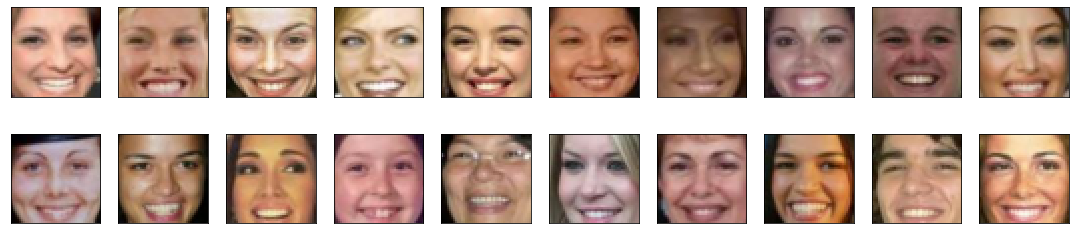

In [44]:
plot_gallery(happy_guys,IMAGE_H,IMAGE_W,n_row=2, n_col=10)

В массиве "happy_guys" лежат 20 веселых людей

In [45]:
df.sort_values(by="Smiling", ascending=True, inplace=True)
df

Male     Asian  ... Wearing Necktie Wearing Necklace
11571   2.13624 -0.882146  ...       -0.412097         -1.84327
1234   0.954913 -0.983356  ...       -0.104821         -1.22919
7506    1.43308   -1.0669  ...       -0.110776        -0.868778
5458  -0.188162 -0.647783  ...        0.464435        -0.972584
7065    1.65926 -0.886879  ...       -0.181398        -0.587911
...         ...       ...  ...             ...              ...
1045   -1.94055 -0.583674  ...        -1.58417         0.964526
5624   -2.65704  -2.05056  ...       -0.975989         0.637409
13034  -1.52268 -0.454004  ...        -1.13999          1.54333
1816  -0.626934 -0.472967  ...       -0.335121          0.72465
8643   -2.51113  -1.76019  ...        -0.59929          1.11155

[13143 rows x 73 columns]

In [46]:
sad_guys = []
sad_indeces = list(df.index[:20])
for el in sad_indeces:
  sad_guys.append(data[el])

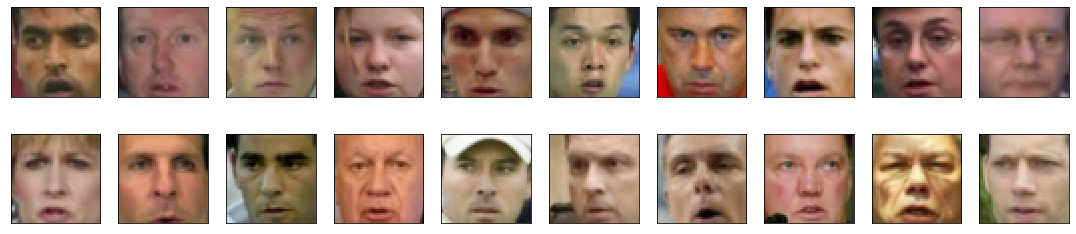

In [47]:
plot_gallery(sad_guys,IMAGE_H,IMAGE_W,n_row=2, n_col=10)

Соответсвенно 20 грустных людей

In [48]:
happy_tens = torch.Tensor(20,3,45,45)
sad_tens = torch.Tensor(20,3,45,45)
for i in range(20):
  happy_tens[i] = transforms.ToTensor()(happy_guys[i])
  sad_tens[i] = transforms.ToTensor()(sad_guys[i])

In [49]:
happy_tens = happy_tens.to(device)
sad_tens = sad_tens.to(device)
latent_happy = model.encode(happy_tens)
latent_sad = model.encode(sad_tens)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [50]:
smiling_vector = latent_happy.mean(axis=0)-latent_sad.mean(axis=0)

In [51]:
reconstraction, latent_code = model(sad_tens)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [52]:
latent_code += 0.6*smiling_vector

In [ ]:
latent_code = latent_code.to(device)

In [53]:
smiling_faces = model.decode(latent_code)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [54]:
smiling_faces = smiling_faces.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)

In [55]:
sad_faces = sad_tens.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)

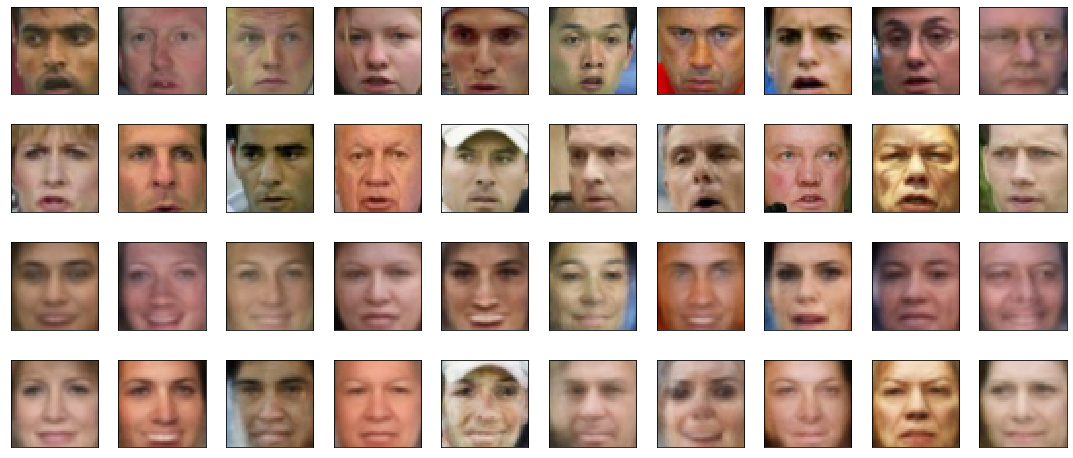

In [56]:
plot_gallery(np.concatenate((sad_faces,smiling_faces), axis=0), IMAGE_H, IMAGE_W, n_row=4,n_col=10)

Первые две строчки-оригинал, вторые две-грустные люди с улыбками

# Variation autoencoder

In [57]:
from copy import deepcopy
from torch.autograd import Variable
class VAE(nn.Module):
    def __init__(self):
      super().__init__()
      self.enc_cnn_1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=1)
      self.enc_cnn_2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1)
      self.enc_cnn_3 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=3, padding=1) # 50 * 10 * 10
      
      self.enc_linear_1 = nn.Linear(50 * 5 * 5, 11 * 11 * 20)
      self.enc_linear_2 = nn.Linear(11 * 11 * 20, 200)
      
      self.enc_linear_3_mu = nn.Linear(200, dim_code)
      self.enc_linear_3_logsigma = nn.Linear(200, dim_code)
      
      
      self.dec_linear_1 = nn.Linear(dim_code, 11 * 11 * 20)
      self.dec_linear_2 = nn.Linear(11 * 11 * 20, 50 * 5 * 5)
      
      self.dec_cnn_1 = nn.ConvTranspose2d(in_channels = 50 , out_channels = 20, kernel_size = 3, stride = 2) #20 * 11 * 11
      self.dec_cnn_2 = nn.ConvTranspose2d(in_channels = 20 , out_channels = 10, kernel_size = 2, stride = 2) #10 * 22 * 22
      self.dec_cnn_3 = nn.ConvTranspose2d(in_channels = 10 , out_channels = 3, kernel_size = 3, stride = 2) #3 * 45 * 45
      
    
      #  <определите архитектуры encoder и decoder>


    
    def encode(self, images):

      code = self.enc_cnn_1(images) 
      code = F.relu(F.max_pool2d(code, 2))


      code = self.enc_cnn_2(code)  
      code = F.relu(F.max_pool2d(code, 2)) 

      code = self.enc_cnn_3(code)  
      code = F.relu(F.max_pool2d(code, 2)) 


      code = code.view([-1, 50 * 5 * 5])
      code = code.view([-1, 50 * 5 * 5])
      code = F.relu(self.enc_linear_1(code))
      code = F.relu(self.enc_linear_2(code))


      mu = self.enc_linear_3_mu(code)
      logsigma = self.enc_linear_3_logsigma(code) 

      return mu, logsigma

    def gaussian_sampler(self, mu, logsigma):
        """
        Функция сэмплирует латентные векторы из нормального распределения с параметрами mu и sigma
        """
        if self.training:
            std = logsigma.exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
    
    def decode(self, code):
      
      out = F.relu(self.dec_linear_1(code)) 
      out = F.relu(self.dec_linear_2(out))
      out = out.view([-1, 50, 5, 5]) 
      
      out = F.relu(self.dec_cnn_1(out))
      out = F.relu(self.dec_cnn_2(out)) 
  
      out = F.sigmoid(self.dec_cnn_3(out))
      return out

    def forward(self, x):
        #<используя encode и decode, реализуйте forward проход автоэнкодера
        #в качестве ваозвращаемых переменных -- mu, logsigma и reconstruction>
      mu, logsigma = self.encode(x)
      reconstruction = self.gaussian_sampler(mu, logsigma)
      reconstruction = self.decode(reconstruction)


      return mu, logsigma, reconstruction

In [58]:
def KL_divergence(mu, logvar):
    """
    часть функции потерь, которая отвечает за "близость" латентных представлений разных людей
    """
    loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss /= 28*28
    return loss

def log_likelihood(x, reconstruction):
    """
    часть функции потерь, которая отвечает за качество реконструкции (как mse в обычном autoencoder)
    """
    loss = F.binary_cross_entropy(reconstruction, x)
    return loss

def loss_vae(x, mu, logvar, reconstruction):
    return KL_divergence(mu, logvar) + log_likelihood(x, reconstruction)

In [59]:
criterion = loss_vae

VAE_autoencoder = VAE().to(device)

optim=torch.optim.Adam(VAE_autoencoder.parameters(), lr=0.001)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 	Training Loss: 0.639316,	val Loss: 0.623440 
Epoch: 1 	Training Loss: 0.621230,	val Loss: 0.618746 
Epoch: 2 	Training Loss: 0.617874,	val Loss: 0.616619 
Epoch: 3 	Training Loss: 0.616185,	val Loss: 0.615102 
Epoch: 4 	Training Loss: 0.614548,	val Loss: 0.614698 
Epoch: 5 	Training Loss: 0.613234,	val Loss: 0.612655 
Epoch: 6 	Training Loss: 0.612454,	val Loss: 0.612461 
Epoch: 7 	Training Loss: 0.611669,	val Loss: 0.611309 
Epoch: 8 	Training Loss: 0.611166,	val Loss: 0.611135 
Epoch: 9 	Training Loss: 0.610708,	val Loss: 0.610612 
Epoch: 10 	Training Loss: 0.610270,	val Loss: 0.610100 
Epoch: 11 	Training Loss: 0.609996,	val Loss: 0.610146 
Epoch: 12 	Training Loss: 0.609546,	val Loss: 0.609456 
Epoch: 13 	Training Loss: 0.609176,	val Loss: 0.609239 
Epoch: 14 	Training Loss: 0.608979,	val Loss: 0.609743 
Epoch: 15 	Training Loss: 0.608692,	val Loss: 0.608822 
Epoch: 16 	Training Loss: 0.608498,	val Loss: 0.608732 
Epoch: 17 	Training Loss: 0.608215,	val Loss: 0.608584 
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch: 20 	Training Loss: 0.607579,	val Loss: 0.608124 
Epoch: 21 	Training Loss: 0.607332,	val Loss: 0.607901 
Epoch: 22 	Training Loss: 0.607274,	val Loss: 0.607832 
Epoch: 23 	Training Loss: 0.607025,	val Loss: 0.607491 
Epoch: 24 	Training Loss: 0.606871,	val Loss: 0.607710 
Epoch: 25 	Training Loss: 0.606775,	val Loss: 0.608039 
Epoch: 26 	Training Loss: 0.606556,	val Loss: 0.607252 
Epoch: 27 	Training Loss: 0.606457,	val Loss: 0.607183 
Epoch: 28 	Training Loss: 0.606283,	val Loss: 0.607224 
Epoch: 29 	Training Loss: 0.606215,	val Loss: 0.607034 
Epoch: 30 	Training Loss: 0.606122,	val Loss: 0.607116 
Epoch: 31 	Training Loss: 0.606019,	val Loss: 0.607149 
Epoch: 32 	Training Loss: 0.605947,	val Loss: 0.607087 
Epoch: 33 	Training Loss: 0.605813,	val Loss: 0.607021 
Epoch: 34 	Training Loss: 0.605757,	val Loss: 0.606918 
Epoch: 35 	Training Loss: 0.605655,	val Loss: 0.606955 
Epoch: 36 	Training Loss: 0.605610,	val Loss: 0.606945 
Epoch: 37 	Training Loss: 0.605539,	val Loss: 0.

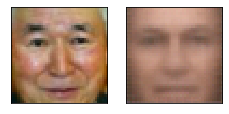

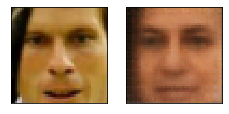

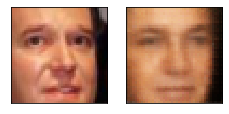

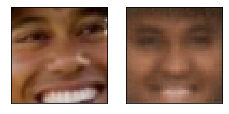

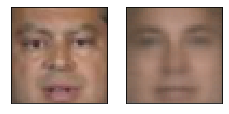

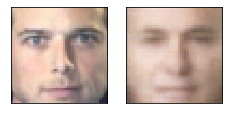

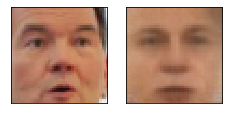

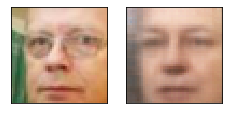

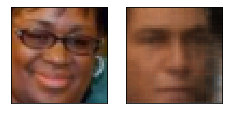

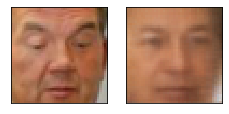

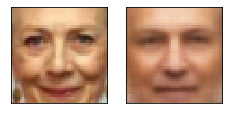

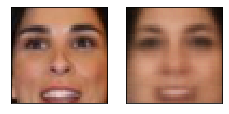

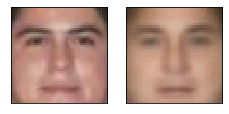

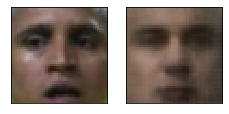

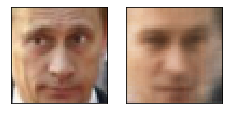

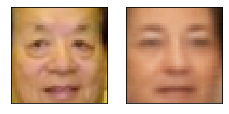

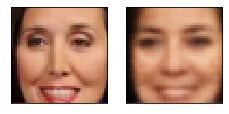

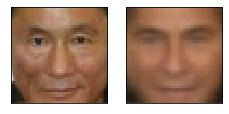

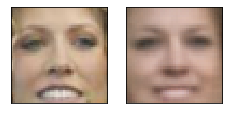

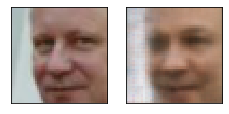

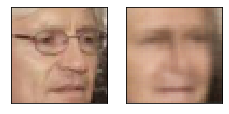

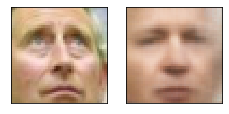

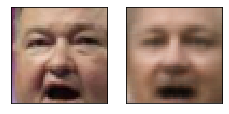

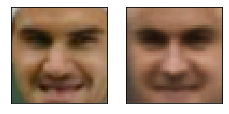

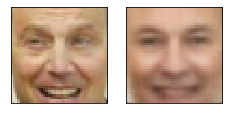

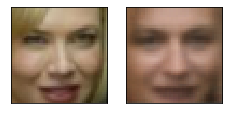

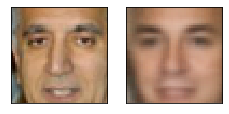

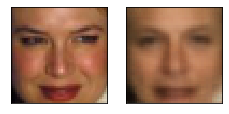

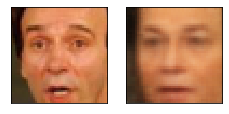

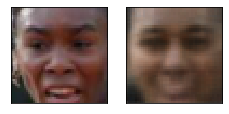

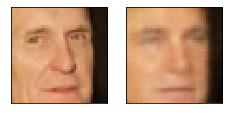

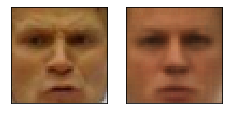

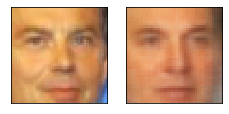

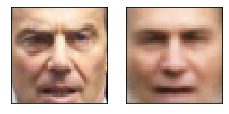

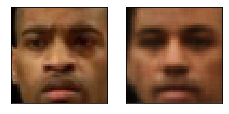

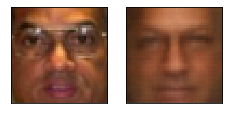

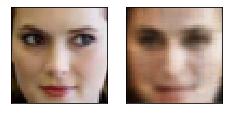

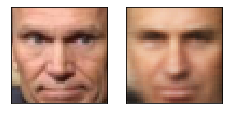

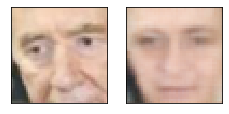

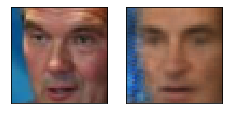

In [60]:
history_train_VAE = []
history_val_VAE = []
train_loss_VAE = 0.0
val_loss_VAE = 0.0
epochs = 40

for i in range(epochs):
  for batch in data_tr:
      batch = batch.to(device)
      optim.zero_grad()
      mu, logvar, reconstruction = VAE_autoencoder(batch)
      loss = criterion(batch, mu, logvar, reconstruction)
      loss.backward()
      optim.step()
      train_loss_VAE += loss.cpu().detach().numpy()

  train_loss_VAE = train_loss_VAE/len(data_tr)
  history_train_VAE.append(train_loss_VAE)
      
  
  for batch in data_val:
      batch = batch.to(device) 
      mu, logvar, reconstruction = VAE_autoencoder(batch)
      loss = criterion(batch, mu, logvar, reconstruction)            
      val_loss_VAE += loss.cpu().detach().numpy()

  val_loss_VAE = val_loss_VAE/len(data_val)
  history_val_VAE.append(val_loss_VAE)

  plot_gallery([batch[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0), reconstruction[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0) ], IMAGE_H, IMAGE_W, n_row=1, n_col=2)
  print('Epoch: {} \tTraining Loss: {:.6f},\tval Loss: {:.6f} '.format(
        i, 
        train_loss_VAE,
        val_loss_VAE
        ))


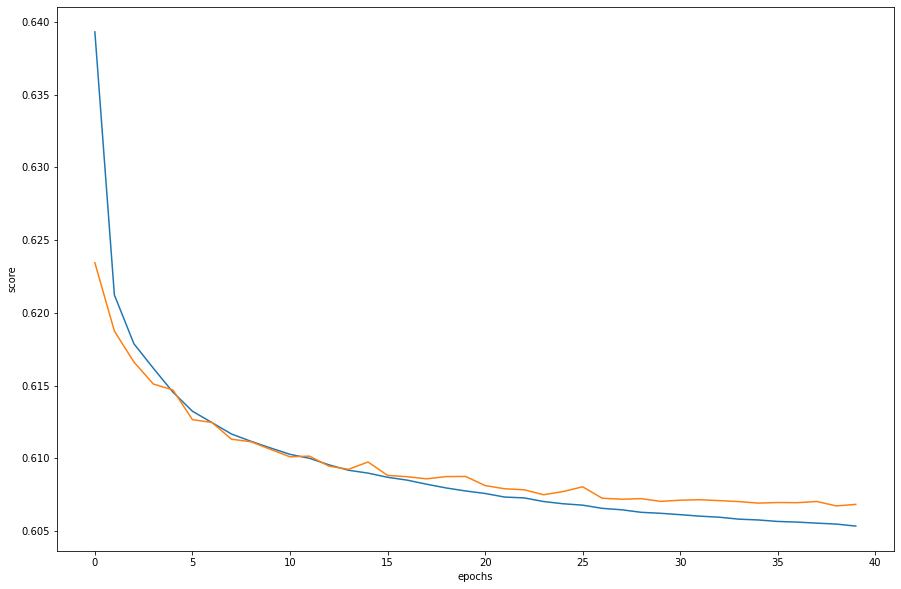

In [61]:
plt.figure(figsize=(15,10))
plt.plot(history_train_VAE, label='Train')
plt.plot(history_val_VAE, label='Val')
plt.xlabel("epochs")
plt.ylabel("score")
plt.show()

In [62]:
for batch in data_val:
      batch = batch.to(device) 
      mu, logvar, reconstruction = VAE_autoencoder(batch)
      break;
      

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [63]:
reconstruction_vae_images = reconstruction.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
print(reconstruction_vae_images.shape)
batch = batch.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
print(batch.shape)

(10, 45, 45, 3)
(10, 45, 45, 3)


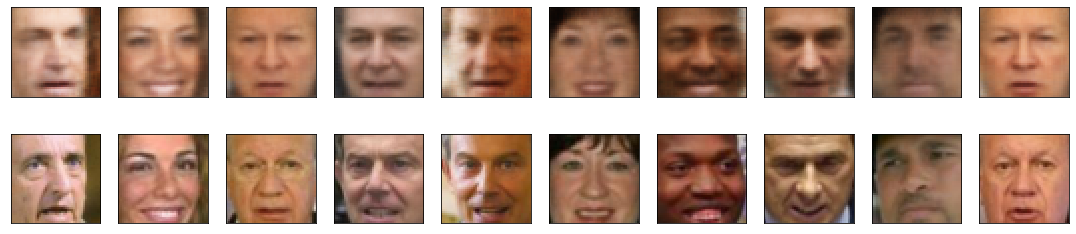

In [64]:
plot_gallery(np.concatenate((reconstruction_vae_images, batch), axis=0), IMAGE_H, IMAGE_W, n_row=2,n_col=10)

# Sampling

In [65]:
q = np.array([np.random.normal(0, 1, 50) for i in range(10)])
torch_tensor = torch.from_numpy(q).to(device)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


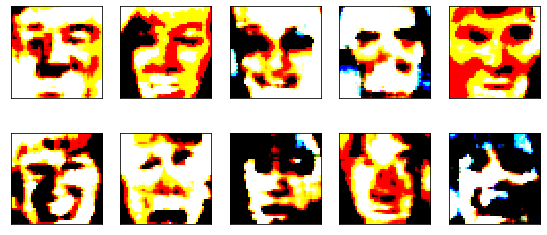

In [66]:
out = VAE_autoencoder.decode(torch_tensor.float())
plot_gallery(out.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1), IMAGE_H, IMAGE_W, n_row=2, n_col=5)

# Сделаем на MNIST

In [4]:
batch_size=10
train_dataset = datasets.MNIST('./data', transform=transforms.ToTensor(), download=True)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST('./data', transform=transforms.ToTensor(), download=True, train=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
def plot_gallery_mnist(images, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        try:
            plt.imshow(images[i].reshape((28,28)), cmap=plt.cm.gray)
            plt.xticks(())
            plt.yticks(())
        except:
            pass

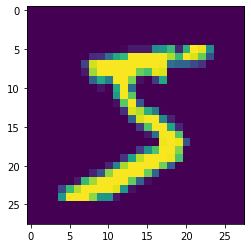

In [67]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28))

In [68]:
from copy import deepcopy
from torch.autograd import Variable
class MNIST_VAE(nn.Module):
    def __init__(self):
      super().__init__()
      self.enc_cnn_1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
      self.enc_cnn_2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
      self.enc_cnn_3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, padding=1) # 20 * 10 * 10
      
      self.enc_linear_1 = nn.Linear(20 * 3 * 3, 7 * 7 * 20)
      self.enc_linear_2 = nn.Linear(7 * 7 * 20, 200)
      
      self.enc_linear_3_mu = nn.Linear(200, dim_code)
      self.enc_linear_3_logsigma = nn.Linear(200, dim_code)
      
      
      self.dec_linear_1 = nn.Linear(dim_code, 7 * 7 * 20)
      self.dec_linear_2 = nn.Linear(7 * 7 * 20, 20 * 3 * 3)
      
      self.dec_cnn_1 = nn.ConvTranspose2d(in_channels = 20 , out_channels = 10, kernel_size = 3, stride = 2) #20 * 7 * 7
      self.dec_cnn_2 = nn.ConvTranspose2d(in_channels = 10 , out_channels = 5, kernel_size = 2, stride = 2) #10 * 14 * 14
      self.dec_cnn_3 = nn.ConvTranspose2d(in_channels = 5 , out_channels = 1, kernel_size = 2, stride = 2) #1 * 28 * 28
      
    
      #  <определите архитектуры encoder и decoder>


    
    def encode(self, images):
      code = self.enc_cnn_1(images) 
      code = F.relu(F.max_pool2d(code, 2)) 

      code = self.enc_cnn_2(code) 
      code = F.relu(F.max_pool2d(code, 2)) 

      code = self.enc_cnn_3(code)  
      code = F.relu(F.max_pool2d(code, 2))


      code = code.view([-1, 20 * 3 * 3])
      code = code.view([-1, 20 * 3 * 3])
      code = F.relu(self.enc_linear_1(code))
      code = F.relu(self.enc_linear_2(code))


      mu = self.enc_linear_3_mu(code)
      logsigma = self.enc_linear_3_logsigma(code) 

      return mu, logsigma

    def gaussian_sampler(self, mu, logsigma):
        """
        Функция сэмплирует латентные векторы из нормального распределения с параметрами mu и sigma
        """
        if self.training:
            std = logsigma.exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
    
    def decode(self, code):
      out = F.relu(self.dec_linear_1(code)) 
      out = F.relu(self.dec_linear_2(out))

      out = out.view([-1, 20, 3, 3]) 

      
      out = F.relu(self.dec_cnn_1(out))
      out = F.relu(self.dec_cnn_2(out))

      out = F.sigmoid(self.dec_cnn_3(out))
      
      return out

    def forward(self, x):
      mu, logsigma = self.encode(x)
      reconstruction = self.gaussian_sampler(mu, logsigma)
      reconstruction = self.decode(reconstruction)


      return mu, logsigma, reconstruction

In [69]:
criterion = loss_vae

VAE_MNIST_autoencoder = MNIST_VAE().to(device)

optim=torch.optim.Adam(VAE_MNIST_autoencoder.parameters(), lr=0.001)

In [70]:
history_train_VAE_MNIST = []
history_val_VAE_MNIST = []
train_loss_VAE_MNIST = 0.0
val_loss_VAE_MNIST = 0.0
epochs = 20

for i in range(epochs):
  for batch, labels in train_dataloader:
      batch = batch.to(device)
      labels = labels.to(device)
      optim.zero_grad()
      mu, logvar, reconstruction = VAE_MNIST_autoencoder(batch)
      loss = criterion(batch, mu, logvar, reconstruction)
      loss.backward()
      optim.step()
      train_loss_VAE_MNIST += loss.cpu().detach().numpy()

  train_loss_VAE_MNIST = train_loss_VAE_MNIST/len(train_dataloader)
  history_train_VAE_MNIST.append(train_loss_VAE_MNIST)
      
  
  for batch, labels in test_dataloader:
      batch = batch.to(device)
      labels = labels.to(device) 
      mu, logvar, reconstruction = VAE_MNIST_autoencoder(batch)
      loss = criterion(batch, mu, logvar, reconstruction)            
      val_loss_VAE_MNIST += loss.cpu().detach().numpy()

  val_loss_VAE_MNIST = val_loss_VAE_MNIST/len(test_dataloader)
  history_val_VAE_MNIST.append(val_loss_VAE_MNIST)
  
  print('Epoch: {} \tTraining Loss: {:.6f},\tval Loss: {:.6f} '.format(
        i, 
        train_loss_VAE_MNIST,
        val_loss_VAE_MNIST
        ))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 	Training Loss: 0.171712,	val Loss: 0.125267 
Epoch: 1 	Training Loss: 0.116926,	val Loss: 0.108327 
Epoch: 2 	Training Loss: 0.106216,	val Loss: 0.101301 
Epoch: 3 	Training Loss: 0.101017,	val Loss: 0.098033 
Epoch: 4 	Training Loss: 0.097749,	val Loss: 0.095056 
Epoch: 5 	Training Loss: 0.095464,	val Loss: 0.094697 
Epoch: 6 	Training Loss: 0.093724,	val Loss: 0.092436 
Epoch: 7 	Training Loss: 0.092457,	val Loss: 0.091285 
Epoch: 8 	Training Loss: 0.091403,	val Loss: 0.089787 
Epoch: 9 	Training Loss: 0.090469,	val Loss: 0.089521 
Epoch: 10 	Training Loss: 0.089638,	val Loss: 0.089737 
Epoch: 11 	Training Loss: 0.088952,	val Loss: 0.088501 
Epoch: 12 	Training Loss: 0.088261,	val Loss: 0.087225 
Epoch: 13 	Training Loss: 0.087640,	val Loss: 0.087312 
Epoch: 14 	Training Loss: 0.087158,	val Loss: 0.087499 
Epoch: 15 	Training Loss: 0.086669,	val Loss: 0.086201 
Epoch: 16 	Training Loss: 0.086160,	val Loss: 0.084450 
Epoch: 17 	Training Loss: 0.085783,	val Loss: 0.085056 
Ep

In [71]:
for batch, labels in test_dataloader:
      batch = batch.to(device)
      labels = labels.to(device) 
      mu, logvar, reconstruction = VAE_MNIST_autoencoder(batch)
      break;

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [72]:
reconst_mnist = reconstruction.to("cpu").clone().detach().numpy()
batch_mnist = batch.to('cpu').clone().detach().numpy()

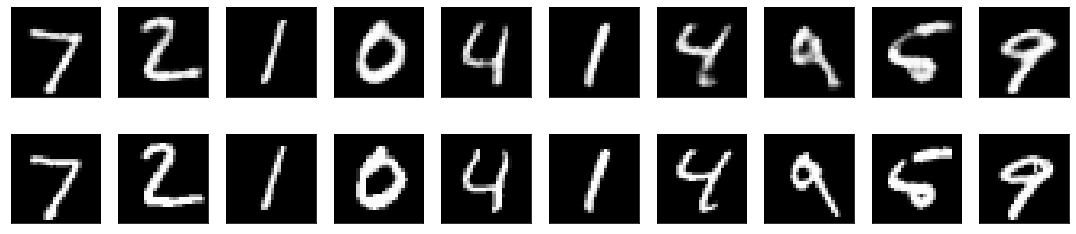

In [73]:
plot_gallery_mnist(np.concatenate((reconst_mnist,batch_mnist), axis=0), 2,10)

In [74]:
z = np.array([np.random.normal(0, 1, 50) for i in range(10)])
torch_tensor = torch.from_numpy(z) 
torch_tensor = torch_tensor.to(device)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


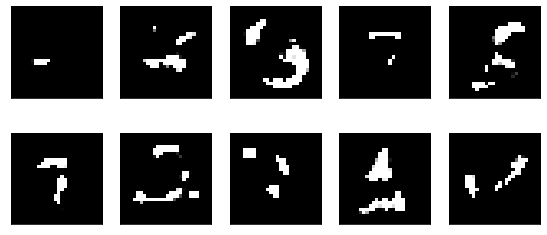

In [75]:
output1 = VAE_MNIST_autoencoder.decode(torch_tensor.float())
plot_gallery_mnist(output1.to("cpu").clone().detach().numpy(), n_row=2, n_col=5)

# Latent Representation

In [76]:
f = open('lfw_attributes.txt')

In [77]:
datas = []
for line in f:
  datas.append(line.split('\t'))

In [78]:
colour = []
for i in range(2,2+val_size):
  colour.append(float(datas[i][3]))

In [79]:
len(colour)

3143

In [80]:
data_visualization = DataLoader(x_val, batch_size=batch_size, shuffle=False)

In [81]:
latents=[]
latent_vectors = []

In [82]:
for images in data_visualization:
  images = images.to(device)
  mu, logsigma, reconstruction = VAE_autoencoder(images)
  latent = VAE_autoencoder.gaussian_sampler(mu, logsigma)
  latents.append(latent.data.cpu().numpy())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [83]:
len(latents)

315

In [84]:
for el in latents:
  for i in range(10):
    latent_vectors.append(el[i])

IndexError: ignored

С дата трейном все ок, с дата вал почему то выскакивает ошибка, которую я не понял как лечить, но все работает если на нее забить и дальше делать.

In [85]:
print(len(latent_vectors))

3143


In [86]:
from sklearn.manifold import TSNE
X_emb = TSNE(n_components=2).fit_transform(latent_vectors)

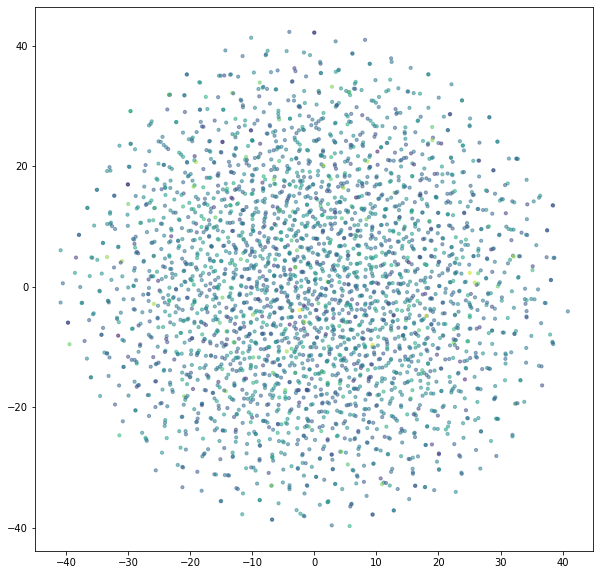

In [87]:
fig, ax = plt.subplots()
ax.scatter(X_emb[:,0], X_emb[:,1], s=10, alpha=0.5, c = colour)
fig.set_figwidth(10)     #  ширина и
fig.set_figheight(10)

С латентным представлением все круто

# Conditional VAE

Сделаем первый вариант с MNIST

In [6]:
from copy import deepcopy
from torch.autograd import Variable
class CVAE(nn.Module):
    def __init__(self, pattern_size, latent_size, class_info):
        super(CVAE,self).__init__()
        self.pattern_size = pattern_size
        self.class_info = class_info

        #encode 
        self.fc1  = nn.Linear(pattern_size + class_info, 400)
        self.fc21 = nn.Linear(400, latent_size)
        self.fc22 = nn.Linear(400, latent_size)

        #decode
        self.fc3 = nn.Linear(latent_size + class_info, 400)
        self.fc4 = nn.Linear(400, pattern_size)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
      
    def encode(self, x, c):

        input = torch.cat([x, c], 1) 
        h1 = self.relu(self.fc1(input))
        z_mu = self.fc21(h1)
        z_var = self.fc22(h1)
        return z_mu, z_var

    def reparametrize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std) + mu
        else:
            return mu

    def decode(self, z, c): 
      
        input = torch.cat([z, c], 1) 
        h3 = self.relu(self.fc3(input))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x, c):
        mu, logvar = self.encode(x.view(-1, 28*28), c)
        z = self.reparametrize(mu, logvar)
        return self.decode(z, c), mu, logvar


In [7]:
def loss_function(recon_x, x, mu, logvar):
    bce = F.binary_cross_entropy(recon_x, x.view(-1,28*28))
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return bce+kld

In [8]:
def to_var(x):
    x = Variable(x)
    if use_cuda:
        x = x.cuda()
    return x

def one_hot(labels, class_size):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return to_var(targets)


In [9]:
use_cuda = True
latent_size = 20
CVAE_autoencoder = CVAE(28*28, latent_size, 10).to(device)
optimizer = torch.optim.Adam(CVAE_autoencoder.parameters(),lr = 0.001)

In [11]:
epochs = 40
train_loss_CVAE = []
test_loss_CVAE = []

for i in range(epochs):
  CVAE_autoencoder.train()
  train_loss = 0
  for batch_idx, (data, labels) in enumerate(train_dataloader):
    data = to_var(data)
    labels = one_hot(labels, 10)
    recon_batch, mu1, logvar1 = CVAE_autoencoder(data, labels)
    optimizer.zero_grad()
    loss = loss_function(recon_batch, data, mu1, logvar1)
    loss.backward()
    train_loss += loss.data
    optimizer.step()
    train_loss_CVAE.append(train_loss)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        i, 
        train_loss
        ))
      
  

Epoch: 0 	Training Loss: 1330.391235
Epoch: 1 	Training Loss: 1329.510376
Epoch: 2 	Training Loss: 1328.730591
Epoch: 3 	Training Loss: 1328.502075
Epoch: 4 	Training Loss: 1327.936768
Epoch: 5 	Training Loss: 1327.631226
Epoch: 6 	Training Loss: 1327.549805
Epoch: 7 	Training Loss: 1327.281860
Epoch: 8 	Training Loss: 1327.163574
Epoch: 9 	Training Loss: 1326.895630
Epoch: 10 	Training Loss: 1326.806641
Epoch: 11 	Training Loss: 1326.682007
Epoch: 12 	Training Loss: 1326.563354
Epoch: 13 	Training Loss: 1326.519775
Epoch: 14 	Training Loss: 1326.383301
Epoch: 15 	Training Loss: 1326.400879
Epoch: 16 	Training Loss: 1326.187988
Epoch: 17 	Training Loss: 1326.131226
Epoch: 18 	Training Loss: 1326.070679
Epoch: 19 	Training Loss: 1326.006226
Epoch: 20 	Training Loss: 1325.996582
Epoch: 21 	Training Loss: 1325.877319
Epoch: 22 	Training Loss: 1325.868164
Epoch: 23 	Training Loss: 1325.815552
Epoch: 24 	Training Loss: 1325.681763
Epoch: 25 	Training Loss: 1325.652588
Epoch: 26 	Training Lo

In [12]:
for i, (data, labels) in enumerate(test_dataloader):
  data = to_var(data)
  labels = one_hot(labels, 10)
  recon_batch, mu, logvar = CVAE_autoencoder(data, labels)
  break;

In [13]:
reconst_mnist_cvae = recon_batch.to("cpu").clone().detach().numpy()
batch_mnist_cvae = data.to('cpu').clone().detach().numpy()

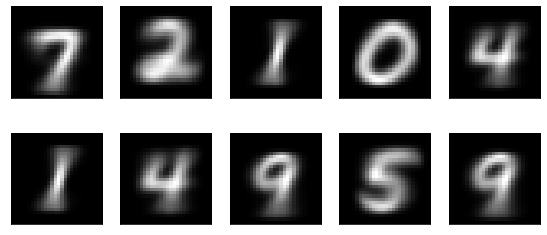

In [14]:
plot_gallery_mnist(reconst_mnist_cvae, 2,5)

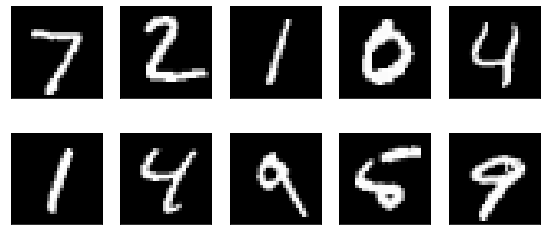

In [15]:
plot_gallery_mnist(batch_mnist_cvae,2,5)

Sampling

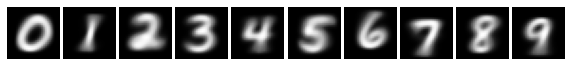

In [16]:
import matplotlib.gridspec as gridspec

c = torch.eye(10, 10) # цифры от 0 до 9
c = to_var(c)
z = to_var(torch.randn(10, latent_size))
samples = CVAE_autoencoder.decode(z, c).data.cpu().numpy()

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

Latent Representations

In [17]:
latent_mnist = []
colours=[]

In [18]:
for batch_idx, (data, labels) in enumerate(train_dataloader):
        data = to_var(data)
        colours.append(labels.data.cpu().numpy())
        labels = one_hot(labels, 10)
        recon_batch, mu, logvar = CVAE_autoencoder(data, labels)
        z = CVAE_autoencoder.reparametrize(mu, logvar)
        latent_mnist.append(z.data.cpu().numpy())

In [19]:
colours1 = []
lat_mnist = []

In [20]:
for vec in colours:
  for i in range(vec.shape[0]):
    colours1.append(vec[i])

for vec in latent_mnist:
  for i in range(vec.shape[0]):
    lat_mnist.append(vec[i])

In [21]:
colours1 = colours1[:10000]
lat_mnist=lat_mnist[:10000]

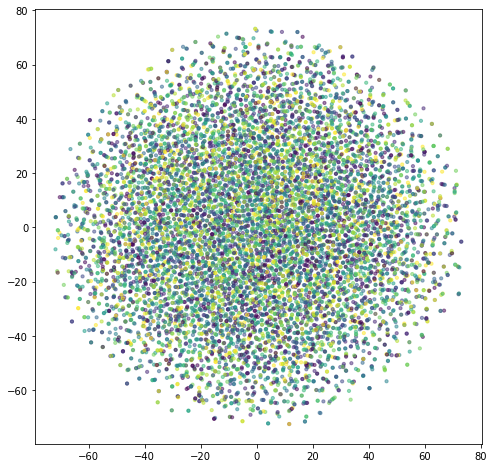

In [22]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(lat_mnist)
fig, ax = plt.subplots()
ax.scatter(X_embedded[:,0], X_embedded[:,1], s=10, alpha=0.5,c = colours1)
fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)

# BONUS 1: Image Morphing

Тут без особых объяснений, в задании было понятно все рассказано что делать

In [88]:
for el in data_tr:
  el = el.to(device)
  reconst_bonus_1, latent_bonus_1 = model(el)
  break;
image_1 = el[0]
image_2 = el[1]
rec_1 = latent_bonus_1[0]
rec_2 = latent_bonus_1[1]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Конечное фото

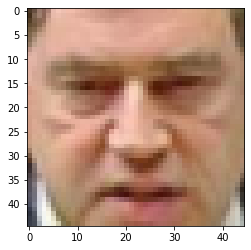

In [89]:
plt.imshow(image_1.to('cpu').detach().numpy().squeeze().transpose(1, 2, 0))

Начальное фото

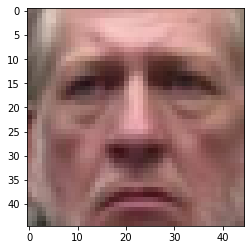

In [90]:
plt.imshow(image_2.to('cpu').detach().numpy().squeeze().transpose(1, 2, 0))

In [91]:
bonus_1 = torch.Tensor(11,50)
for i in range(11):
  bonus_1[i] = ((i * 0.1) * rec_1 + (1 - i * 0.1) * rec_2)
bonus_1 = bonus_1.to(device)

In [92]:
vectors = model.decode(bonus_1)
print(vectors.shape)

torch.Size([11, 3, 45, 45])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


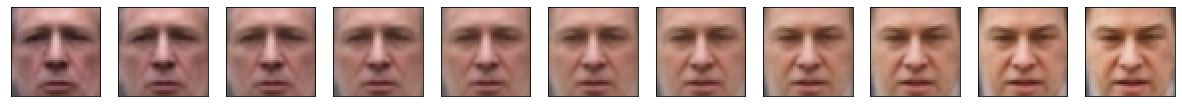

In [93]:
vectors = vectors.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
plot_gallery(vectors,IMAGE_H,IMAGE_W,n_row=1,n_col=11)

# BONUS 2: Denoising 

Сделаем датасет из картинок с шумом и тех же без шума. То есть кортеж из двух картинок. Далее в обучении будем в лосс подавать реконстракцию картинки без шума и с шумом, посмотрим че получится. Начнем с создания такого датасета.

In [94]:
def make_noise(image, noise_factor):
  image_noisy = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape) 
  return image_noisy

In [95]:
noise_train = []
noise_val = []

for i in range(tr_size):
  noise_train.append((transforms.ToTensor()(X_train[i]).float(), transforms.ToTensor()(make_noise(X_train[i], 0.08)).float()))

for i in range(val_size):
  noise_val.append((transforms.ToTensor()(X_val[i]).float(), transforms.ToTensor()(make_noise(X_val[i], 0.08)).float()))

Итого есть датасет, сделаем из него даталоадер и будем обучать по плану 

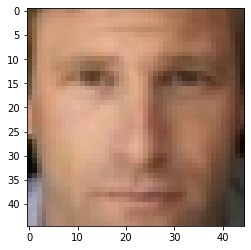

In [96]:
plt.imshow(noise_train[0][0].to('cpu').detach().numpy().squeeze().transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


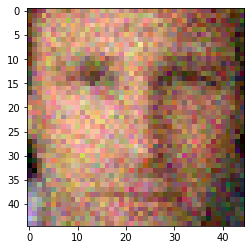

In [97]:
plt.imshow(noise_train[0][1].to('cpu').detach().numpy().squeeze().transpose(1, 2, 0))

In [98]:
from torch.utils.data import DataLoader
batch_size = 10
data_tr_noise = DataLoader(noise_train, batch_size=batch_size, shuffle=True)
data_val_noise = DataLoader(noise_val, batch_size=batch_size, shuffle=True)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 	Training Loss: 0.628527,	val Loss: 0.618884 
Epoch: 1 	Training Loss: 0.617717,	val Loss: 0.610106 
Epoch: 2 	Training Loss: 0.614456,	val Loss: 0.616023 
Epoch: 3 	Training Loss: 0.612900,	val Loss: 0.632358 
Epoch: 4 	Training Loss: 0.611792,	val Loss: 0.624168 
Epoch: 5 	Training Loss: 0.610778,	val Loss: 0.602993 
Epoch: 6 	Training Loss: 0.610064,	val Loss: 0.572587 
Epoch: 7 	Training Loss: 0.609258,	val Loss: 0.609707 
Epoch: 8 	Training Loss: 0.608619,	val Loss: 0.615892 
Epoch: 9 	Training Loss: 0.608111,	val Loss: 0.613936 
Epoch: 10 	Training Loss: 0.607703,	val Loss: 0.610099 
Epoch: 11 	Training Loss: 0.607289,	val Loss: 0.612083 
Epoch: 12 	Training Loss: 0.606863,	val Loss: 0.604861 
Epoch: 13 	Training Loss: 0.606503,	val Loss: 0.615982 
Epoch: 14 	Training Loss: 0.606147,	val Loss: 0.608426 
Epoch: 15 	Training Loss: 0.605878,	val Loss: 0.617730 
Epoch: 16 	Training Loss: 0.605585,	val Loss: 0.607245 
Epoch: 17 	Training Loss: 0.605297,	val Loss: 0.594920 
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch: 20 	Training Loss: 0.604575,	val Loss: 0.620520 
Epoch: 21 	Training Loss: 0.604325,	val Loss: 0.617324 
Epoch: 22 	Training Loss: 0.604183,	val Loss: 0.608236 
Epoch: 23 	Training Loss: 0.603957,	val Loss: 0.615659 
Epoch: 24 	Training Loss: 0.603768,	val Loss: 0.622348 
Epoch: 25 	Training Loss: 0.603611,	val Loss: 0.611621 
Epoch: 26 	Training Loss: 0.603449,	val Loss: 0.629146 
Epoch: 27 	Training Loss: 0.603317,	val Loss: 0.620508 
Epoch: 28 	Training Loss: 0.603155,	val Loss: 0.604959 
Epoch: 29 	Training Loss: 0.603046,	val Loss: 0.576965 
Epoch: 30 	Training Loss: 0.602898,	val Loss: 0.599139 
Epoch: 31 	Training Loss: 0.602789,	val Loss: 0.616635 
Epoch: 32 	Training Loss: 0.602680,	val Loss: 0.590843 
Epoch: 33 	Training Loss: 0.602570,	val Loss: 0.597471 
Epoch: 34 	Training Loss: 0.602503,	val Loss: 0.597305 
Epoch: 35 	Training Loss: 0.602403,	val Loss: 0.621021 
Epoch: 36 	Training Loss: 0.602295,	val Loss: 0.600121 
Epoch: 37 	Training Loss: 0.602237,	val Loss: 0.

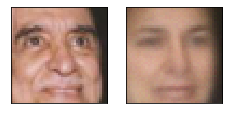

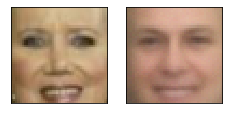

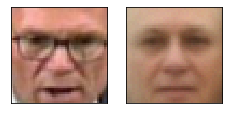

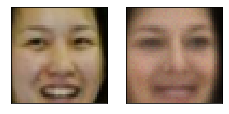

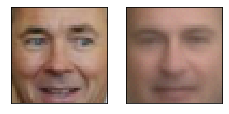

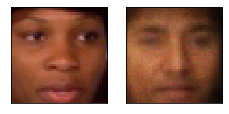

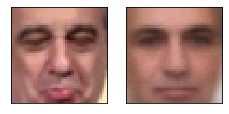

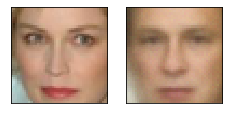

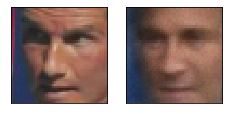

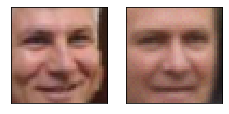

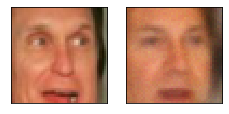

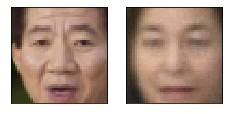

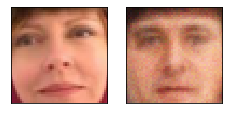

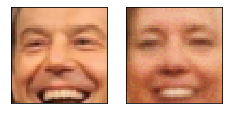

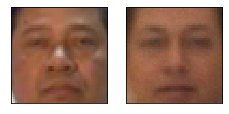

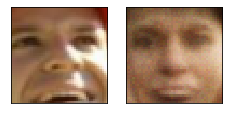

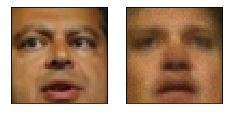

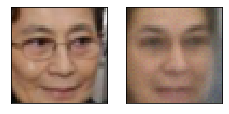

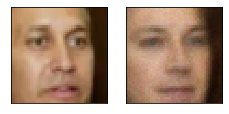

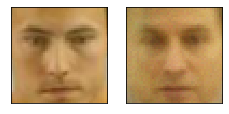

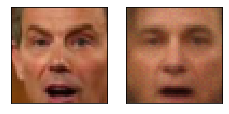

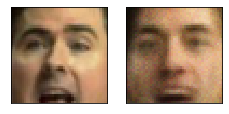

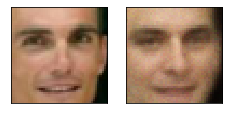

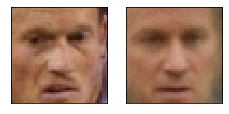

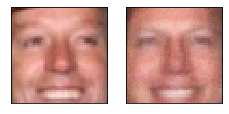

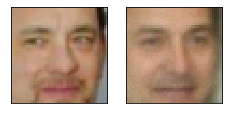

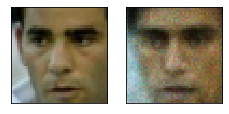

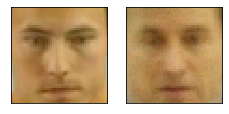

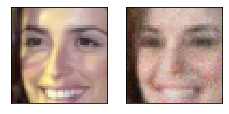

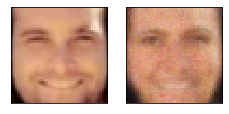

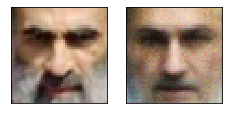

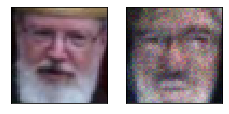

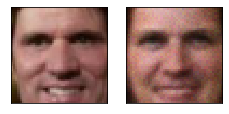

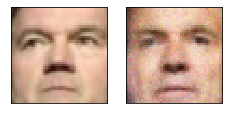

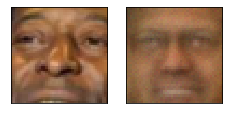

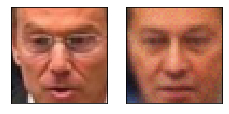

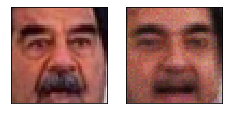

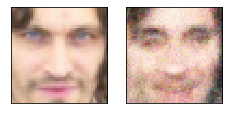

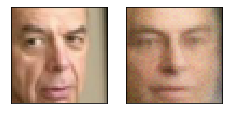

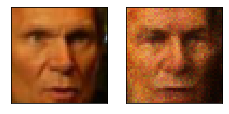

In [99]:
model = OneAutoencoder().to(device)
optim=torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn=nn.BCELoss()

history_train_noise = []
history_val_noise = []
train_loss = 0.0
val_loss = 0.0
epochs = 40

for i in range(epochs):
  for batch in data_tr_noise:
      batch[0] = batch[0].to(device)
      batch[1] = batch[1].to(device)
      optim.zero_grad()
      recons_noise = model(batch[0])[0]
      loss = loss_fn(recons_noise, batch[1])
      loss.backward()
      optim.step()
      train_loss += loss.cpu().detach().numpy()

  train_loss = train_loss/len(data_tr)
  history_train_noise.append(train_loss)
      
  
  for batch in data_val_noise:
      batch[0] = batch[0].to(device)
      batch[1] = batch[1].to(device)
      recons_noise = model(batch[0])[0]           
      valloss = loss_fn(recons_noise, batch[1])            
      val_loss += loss.cpu().detach().numpy()

  val_loss = val_loss/len(data_val)
  history_val_noise.append(val_loss)

  plot_gallery([batch[0][0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0), recons_noise[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0) ], IMAGE_H, IMAGE_W, n_row=1, n_col=2)
  print('Epoch: {} \tTraining Loss: {:.6f},\tval Loss: {:.6f} '.format(
        i, 
        train_loss,
        val_loss
        ))


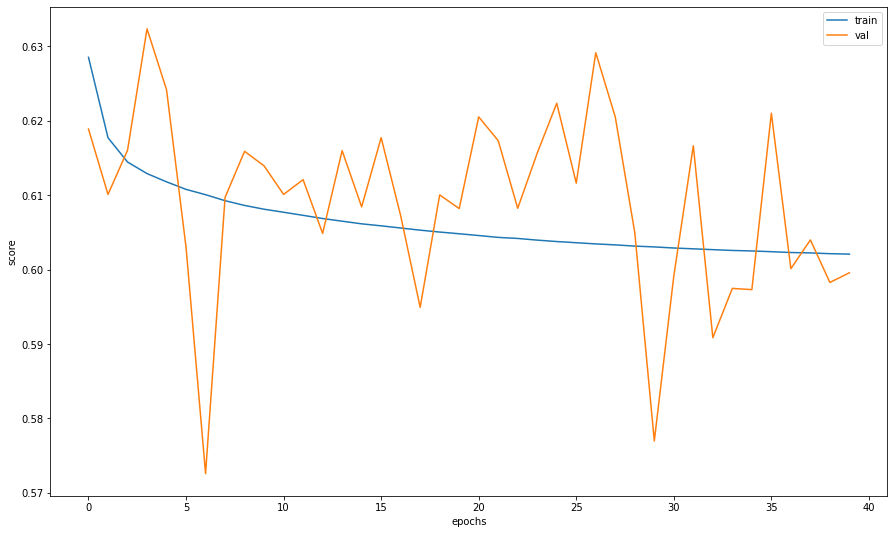

In [100]:
plt.figure(figsize=(15, 9))
plt.plot(history_train_noise, label="train")
plt.plot(history_val_noise, label="val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("score")
plt.show()

In [101]:
for image in data_val_noise:
  image[0] = image[0].to(device)
  image[1] = image[1].to(device)
  recons_noise = model(image[0])[0]
  break;

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [102]:
recons_noise = recons_noise.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
image = image[1].to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

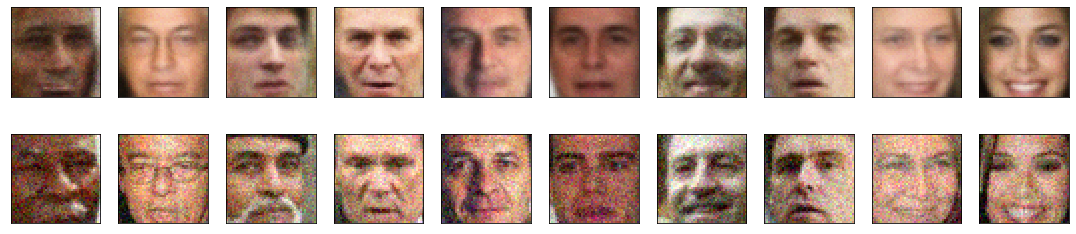

In [103]:
plot_gallery(np.concatenate((recons_noise, image), axis=0), IMAGE_H, IMAGE_W,n_row=2,n_col=10)

Все работает нормуль

# Бонус 2.1: Occlusion

Очень похоже на предыдущий бонус, только датасет другой, точнее будет функция не добавления шума, а рандомного вырезания кусочка картинки, остальной код будет такой же как и в предыдущем бонусе.

In [104]:
from random import randint

In [105]:
def occlusion_image(image):
  img1 = image.copy()
  x = randint(0, 45-5)
  y = randint(0, 45-5)
  for i in range(x, x+5):
    for j in range(y, y+5):
      img1[i][j]=0
  return img1

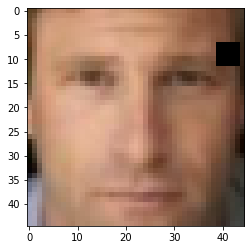

In [106]:
plt.imshow(occlusion_image(X_train[0]))

In [107]:
occlusion_train = []
occlusion_val = []

for i in range(tr_size):
  occlusion_train.append((transforms.ToTensor()(X_train[i]).float(), transforms.ToTensor()(occlusion_image(X_train[i],)).float()))

for i in range(val_size):
  occlusion_val.append((transforms.ToTensor()(X_val[i]).float(), transforms.ToTensor()(occlusion_image(X_val[i])).float()))

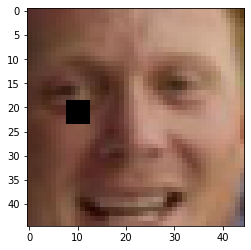

In [108]:
plt.imshow(occlusion_train[1][1].to('cpu').detach().numpy().squeeze().transpose(1, 2, 0))

In [109]:
from torch.utils.data import DataLoader
batch_size = 10
data_tr_occlusion = DataLoader(occlusion_train, batch_size=batch_size, shuffle=True)
data_val_occlusion = DataLoader(occlusion_val, batch_size=batch_size, shuffle=True)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 	Training Loss: 0.063080,	val Loss: 0.062966 
Epoch: 1 	Training Loss: 0.061966,	val Loss: 0.062882 
Epoch: 2 	Training Loss: 0.061682,	val Loss: 0.059660 
Epoch: 3 	Training Loss: 0.061426,	val Loss: 0.063034 
Epoch: 4 	Training Loss: 0.061305,	val Loss: 0.062179 
Epoch: 5 	Training Loss: 0.061221,	val Loss: 0.062067 
Epoch: 6 	Training Loss: 0.061147,	val Loss: 0.059613 
Epoch: 7 	Training Loss: 0.061082,	val Loss: 0.060811 
Epoch: 8 	Training Loss: 0.061027,	val Loss: 0.061684 
Epoch: 9 	Training Loss: 0.060979,	val Loss: 0.060052 
Epoch: 10 	Training Loss: 0.060940,	val Loss: 0.062157 
Epoch: 11 	Training Loss: 0.060904,	val Loss: 0.060851 
Epoch: 12 	Training Loss: 0.060862,	val Loss: 0.060381 
Epoch: 13 	Training Loss: 0.060828,	val Loss: 0.057796 
Epoch: 14 	Training Loss: 0.060793,	val Loss: 0.060141 
Epoch: 15 	Training Loss: 0.060767,	val Loss: 0.062426 
Epoch: 16 	Training Loss: 0.060738,	val Loss: 0.061842 
Epoch: 17 	Training Loss: 0.060708,	val Loss: 0.061675 
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch: 20 	Training Loss: 0.060636,	val Loss: 0.060413 
Epoch: 21 	Training Loss: 0.060614,	val Loss: 0.061156 
Epoch: 22 	Training Loss: 0.060594,	val Loss: 0.060923 
Epoch: 23 	Training Loss: 0.060578,	val Loss: 0.060632 
Epoch: 24 	Training Loss: 0.060561,	val Loss: 0.059960 
Epoch: 25 	Training Loss: 0.060547,	val Loss: 0.060502 
Epoch: 26 	Training Loss: 0.060529,	val Loss: 0.057409 
Epoch: 27 	Training Loss: 0.060518,	val Loss: 0.060089 
Epoch: 28 	Training Loss: 0.060500,	val Loss: 0.059615 
Epoch: 29 	Training Loss: 0.060491,	val Loss: 0.061922 
Epoch: 30 	Training Loss: 0.060479,	val Loss: 0.062127 
Epoch: 31 	Training Loss: 0.060469,	val Loss: 0.060854 
Epoch: 32 	Training Loss: 0.060455,	val Loss: 0.060623 
Epoch: 33 	Training Loss: 0.060444,	val Loss: 0.061268 
Epoch: 34 	Training Loss: 0.060435,	val Loss: 0.061274 
Epoch: 35 	Training Loss: 0.060425,	val Loss: 0.062603 
Epoch: 36 	Training Loss: 0.060420,	val Loss: 0.060381 
Epoch: 37 	Training Loss: 0.060406,	val Loss: 0.

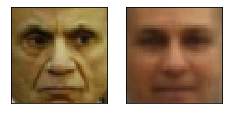

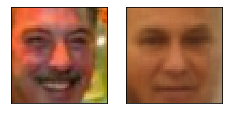

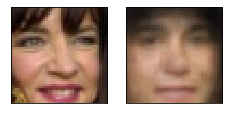

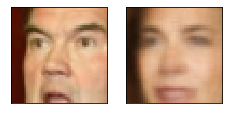

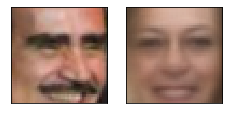

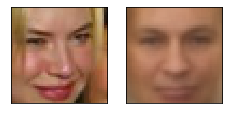

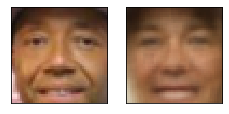

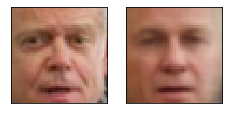

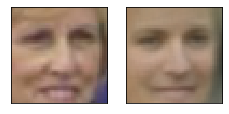

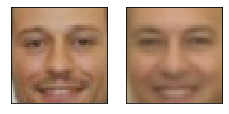

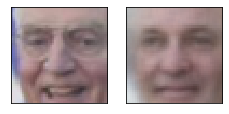

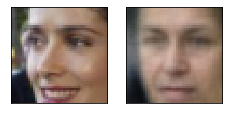

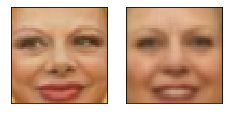

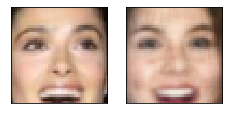

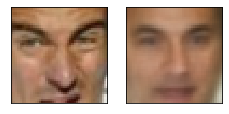

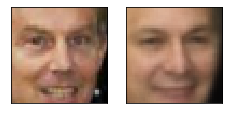

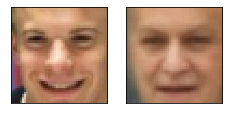

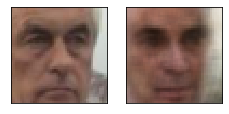

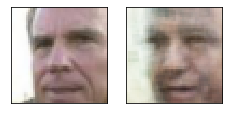

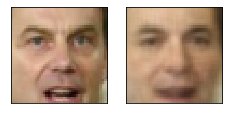

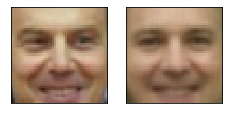

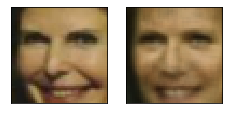

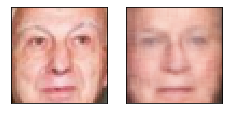

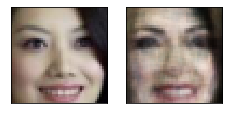

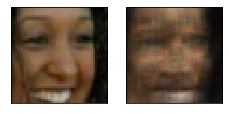

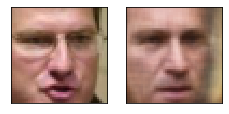

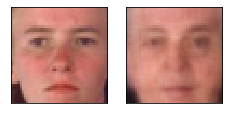

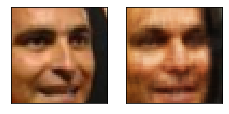

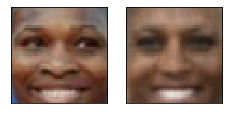

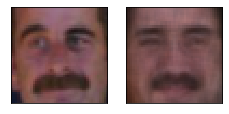

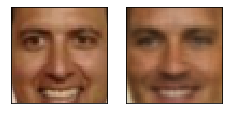

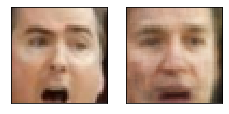

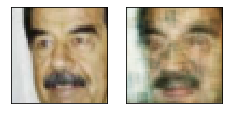

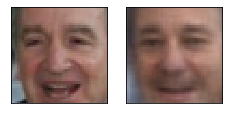

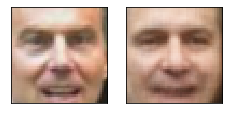

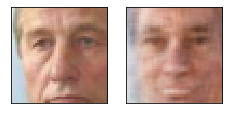

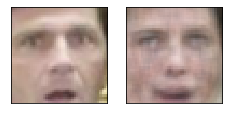

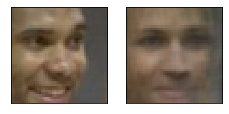

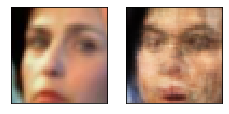

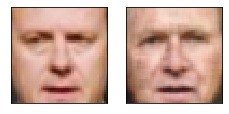

In [110]:
model = OneAutoencoder().to(device)
optim=torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn=nn.BCELoss()

history_train_occlusion = []
history_val_occlusion = []
train_loss = 0.0
val_loss = 0.0
epochs = 40

for i in range(epochs):
  for batch in data_tr_occlusion:
      batch[0] = batch[0].to(device)
      batch[1] = batch[1].to(device)
      optim.zero_grad()
      recons_occlusion = model(batch[0])[0]
      loss = loss_fn(recons_occlusion, batch[1])
      loss.backward()
      optim.step()
      train_loss += loss.cpu().detach().numpy()

  train_loss = train_loss/len(data_tr_occlusion.dataset)
  history_train_occlusion.append(train_loss)
      
  
  for batch in data_val_occlusion:
      batch[0] = batch[0].to(device)
      batch[1] = batch[1].to(device)
      recons_occlusion = model(batch[0])[0]           
      valloss = loss_fn(recons_occlusion, batch[1])            
      val_loss += loss.cpu().detach().numpy()

  val_loss = val_loss/len(data_val_occlusion.dataset)
  history_val_occlusion.append(val_loss)

  plot_gallery([batch[0][0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0), recons_occlusion[0].to("cpu").clone().detach().numpy().squeeze().transpose(1, 2, 0) ], IMAGE_H, IMAGE_W, n_row=1, n_col=2)
  print('Epoch: {} \tTraining Loss: {:.6f},\tval Loss: {:.6f} '.format(
        i, 
        train_loss,
        val_loss
        ))

In [114]:
for image in data_val_occlusion:
  image[0] = image[0].to(device)
  image[1] = image[1].to(device)
  recons_occlusion = model(image[0])[0]
  break;

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [115]:
recons_occlusion = recons_occlusion.to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)
image = image[1].to("cpu").clone().detach().numpy().squeeze().transpose(0, 2, 3, 1)

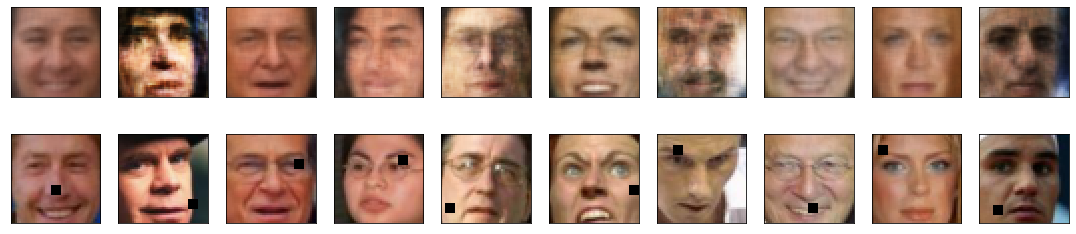

In [116]:
plot_gallery(np.concatenate((recons_occlusion, image), axis=0), IMAGE_H, IMAGE_W,n_row=2,n_col=10)

Хорошо работает в целом 